Задача кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv", sep=",")

In [ ]:
data.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good


In [ ]:
data.tail()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
999,no checking account,30,no credits taken/all credits paid back duly,car (used),6350,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,car or other,31,none,rent,1,skilled employee/official,0 to 2,no,no,bad


Определяем наличие пропусков в данных.

In [ ]:
data.isnull().sum().sum()
data.isnull().sum()

,0
status,0
duration,0
credit_history,0
purpose,0
amount,0
savings,0
employment_duration,0
installment_rate,0
personal_status_sex,0
other_debtors,0


Признаки (credit_risk - не признак, а целевая переменная)
  
  **Количественные:**  
*   ***duration***
*   ***amount***
*   ***age***


**Бинарные:**
*   ***telephone*** - принимает 2 значения: 'yes (under customer name)' и 'no'
*   ***foreign_worker*** - принимает 2 значения: 'yes' и 'no'
*   ***people_liable*** - принимает 2 значения: '0 to 2' и '3 or more'


**Порядковые:**
*   ***status*** - нельзя применять арифметические операции к таким значениям размера текущего счета, но можно их сравнивать и понимать, у кого больше размер счета - может пригодиться, например, для того, чтобы выдавать кредит под индивидуальные условия (можно предсказать, сколько клиент сможет выплачивать одной выплатой, учитывая размер текущего счета)
*   ***savings*** - нельзя применять арифметические операции к таким значениям размера сбережений, но можно их сравнивать и понимать, у кого больше размер сбережений - может пригодиться, например, для изымания части кредита, невыплаченной клиентом
*   ***employment_duration*** - нельзя применять арифметические операции к таким значениям срока работы, но можно их сравнивать и делать выводы: чем дольше срок работы, тем стабильнее у клиента доход, тогда можно делать прогноз о его возможностях выплачивать определенную сумму
*   ***installment_rate*** - нельзя применять арифметические операции к таким значениям, но можно их сравнивать и делать выводы: чем меньше выплата, тем больше процентов сможет начислить банк (выгодно для банка); а чем больше выплата, тем быстрее клиент отдаст кредит (надежно для банка)
*   ***present_residence*** - нельзя применять арифметические операции к таким значениям срока гражданства, но можно их сравнивать и делать выводы: чем дольше клиент является гражданином, тем больше уровень доверия к нему
*   ***number_credits*** - нельзя применять арифметические операции к таким значениям числа кредитов (ещё не закрытых), но можно их сравнивать и делать выводы: чем больше у клиента число кредитов, тем менее он платежеспособен погасить новый кредит


**Категориальные:**
*   ***credit_history*** - нельзя применить арифметические операции и непонятно, как задать операции сравнения: что больше задержка в оплате в прошлом или другие кредиты в другом месте? - Неясно
*   ***purpose*** - нельзя применить арифметические операции и непонятно, как задать операции сравнения: что больше бизнес или радио? - Бесполезное сравнение
*   ***personal_status_sex*** - нельзя применить арифметические операции и непонятно, как задать операции сравнения: что больше разведенный или одинокий? - неясно, в чем разница
*   ***other_debtors*** - нельзя применить арифметические операции и непонятно, как задать операции сравнения: что выгоднее для банка, чтобы у клиента был созаемщик или поручитель? - неясно
*   ***property*** - нельзя применить арифметические операции и непонятно, как задать операции сравнения: что больше страховка жизни или машина? - неясно, в чем различие между категориями
*   ***other_installment_plans*** - нельзя применить арифметические операции и непонятно, как задать операции сравнения: что больше категория банк или магазины? - неясно, в чем разница (можно купить макбук за 500т. и взять кредит на 10т.; а можно купить продуктов на 10т. и кредит взять на 500т.)
*   ***housing*** - нельзя применить арифметические операции к жилью и непонятно, как задать операции сравнения: что больше собственное жилье или бесплатное? Допустим, за собственное нужно платить коммунульные услуги, а за бесплатное не нужно; но собственное можно изъять за долги... - непонятно, каким образом сравнивать
*   ***job*** - нельзя применить арифметические операции и непонятно, как задать операции сравнения: какая категория больше 'skilled employee/official' или 'manager/self-empl./highly qualif. employee'? - неясно, т.к. в первой может быть квалифицированный работник, а во второй самозанятый/высококвалифицированный. Странно было бы такое сравнивать



Найдем среднюю среднюю сумму кредита в каждой категории.

In [ ]:
data.groupby(by='purpose').amount.mean()

,amount
purpose,
business,8209.333333
car (new),5370.223301
car (used),3066.983425
domestic appliances,2728.090909
furniture/equipment,2487.685714
others,3062.948718
radio/television,1498.000000
repairs,3180.400000
retraining,4158.041237


Ответим на вопрос, какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [ ]:
data.housing.unique()

array(['for free', 'rent', 'own'], dtype=object)

In [ ]:
print('Процент клиентов моложе 30 лет снимает жилье:', data[(data.age < 30) & (data.housing == 'rent')].shape[0] / data[data.age < 30].shape[0] * 100)
print('Процент клиентов старше 40 лет снимает жилье:', data[(data.age > 40) & (data.housing == 'rent')].shape[0] / data[data.age > 40].shape[0] * 100)

Процент клиентов моложе 30 лет снимает жилье: 66.66666666666666
Процент клиентов старше 40 лет снимает жилье: 68.01470588235294


 У скольких иностранцев число кредитов больше 3?

In [ ]:
data.number_credits.unique()

array(['1', '2-3', '4-5', '>= 6'], dtype=object)

In [ ]:
data.foreign_worker.unique()

array(['no', 'yes'], dtype=object)

In [ ]:
print('Количество иностранцев с числом кредитов > 3:', data[((data.number_credits == '4-5') | (data.number_credits == '>=6')) & (data.foreign_worker == 'yes')].shape[0])

Количество иностранцев с числом кредитов > 3: 1


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Построим зеркальные горизонтальные гистограммы.

In [ ]:
data.status.unique()

array(['no checking account', '... < 0 DM',
       '... >= 200 DM / salary for at least 1 year', '0<= ... < 200 DM'],
      dtype=object)

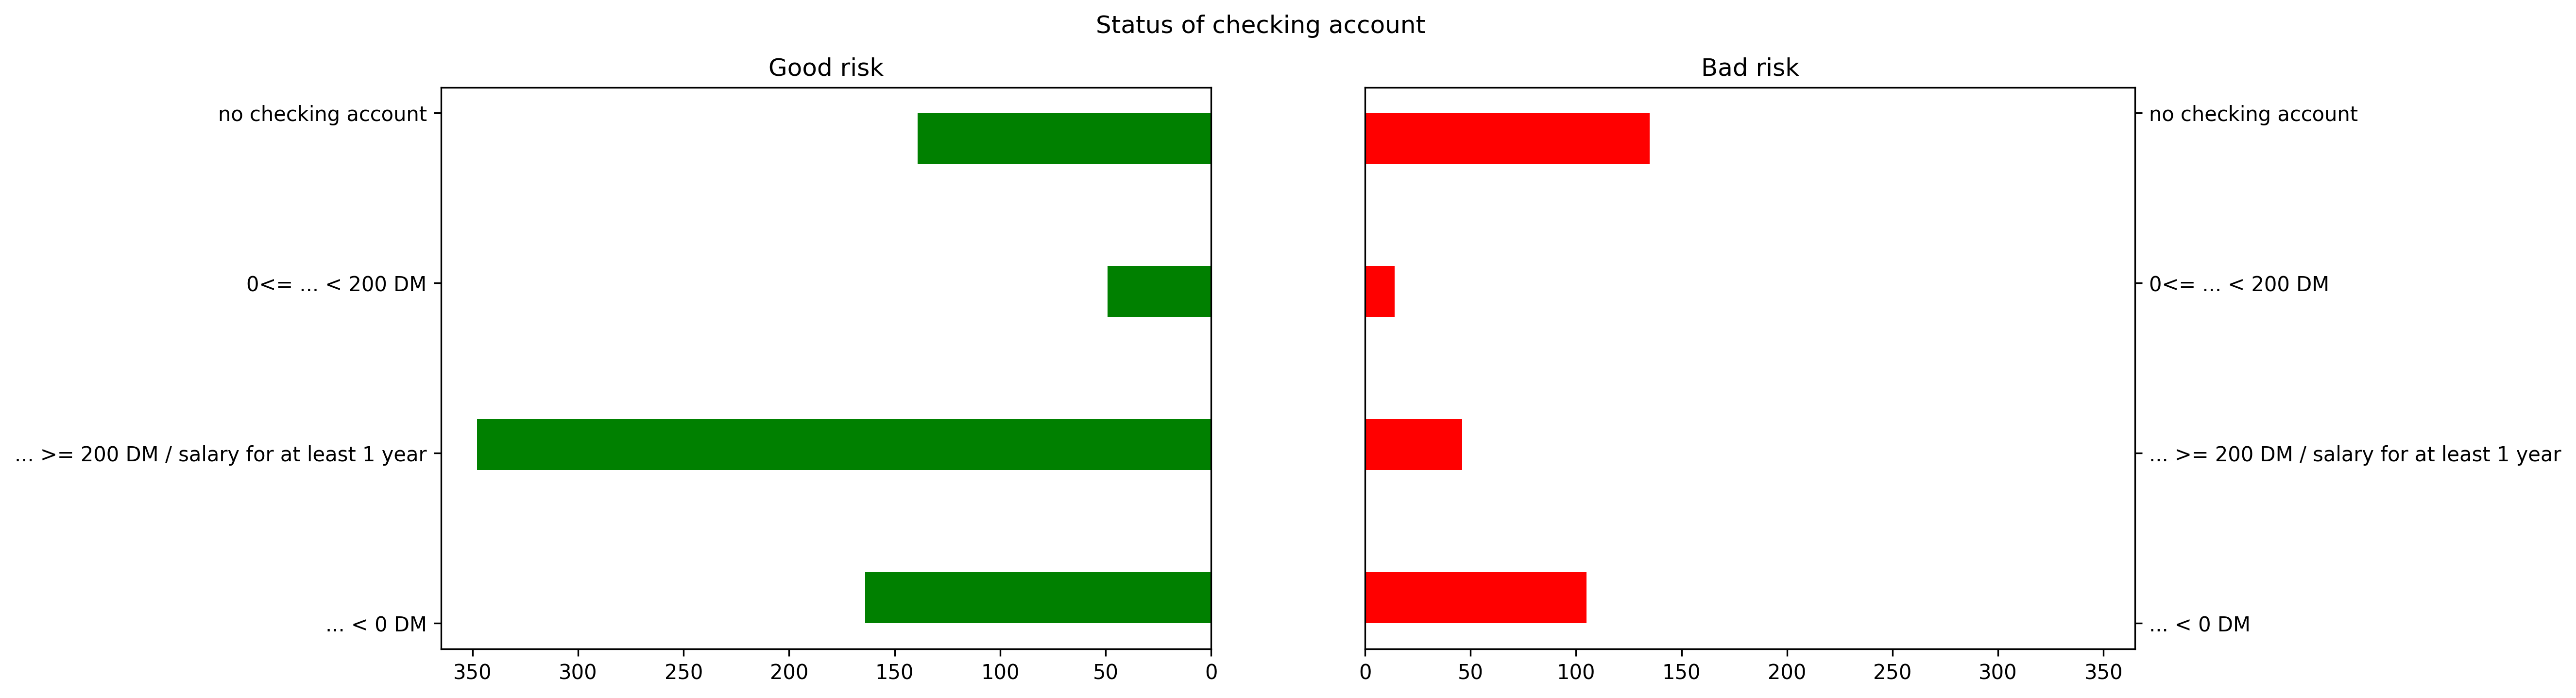

In [ ]:
plt.figure(figsize=(15, 5), dpi=300)
plt.suptitle("Status of checking account")
plt.subplot(1, 2, 1)
plt.title('Good risk')
plt.hist(sorted(data[data.credit_risk == 'good']['status']), orientation = 'horizontal', color='green')
plt.xlim(0, 365)
plt.gca().invert_xaxis()

plt.subplot(1, 2, 2)
plt.title('Bad risk')
plt.hist(sorted(data[data.credit_risk == 'bad']['status']), orientation='horizontal', color='red')
plt.tick_params(axis='y', left=False, right=True, labelleft=False, labelright=True)
plt.xlim(0, 365)
plt.show()

Вывод: наибольшее количество при разных рисках при статусе '... >= 200 DM / salary for at least 1 year'. Также заметим, что при положительном кейсе количество клиентов с любым статусом значительно превышает количество клиентов при отрицательном кейсе.

In [ ]:
import seaborn as sns

Теперь построим гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта.

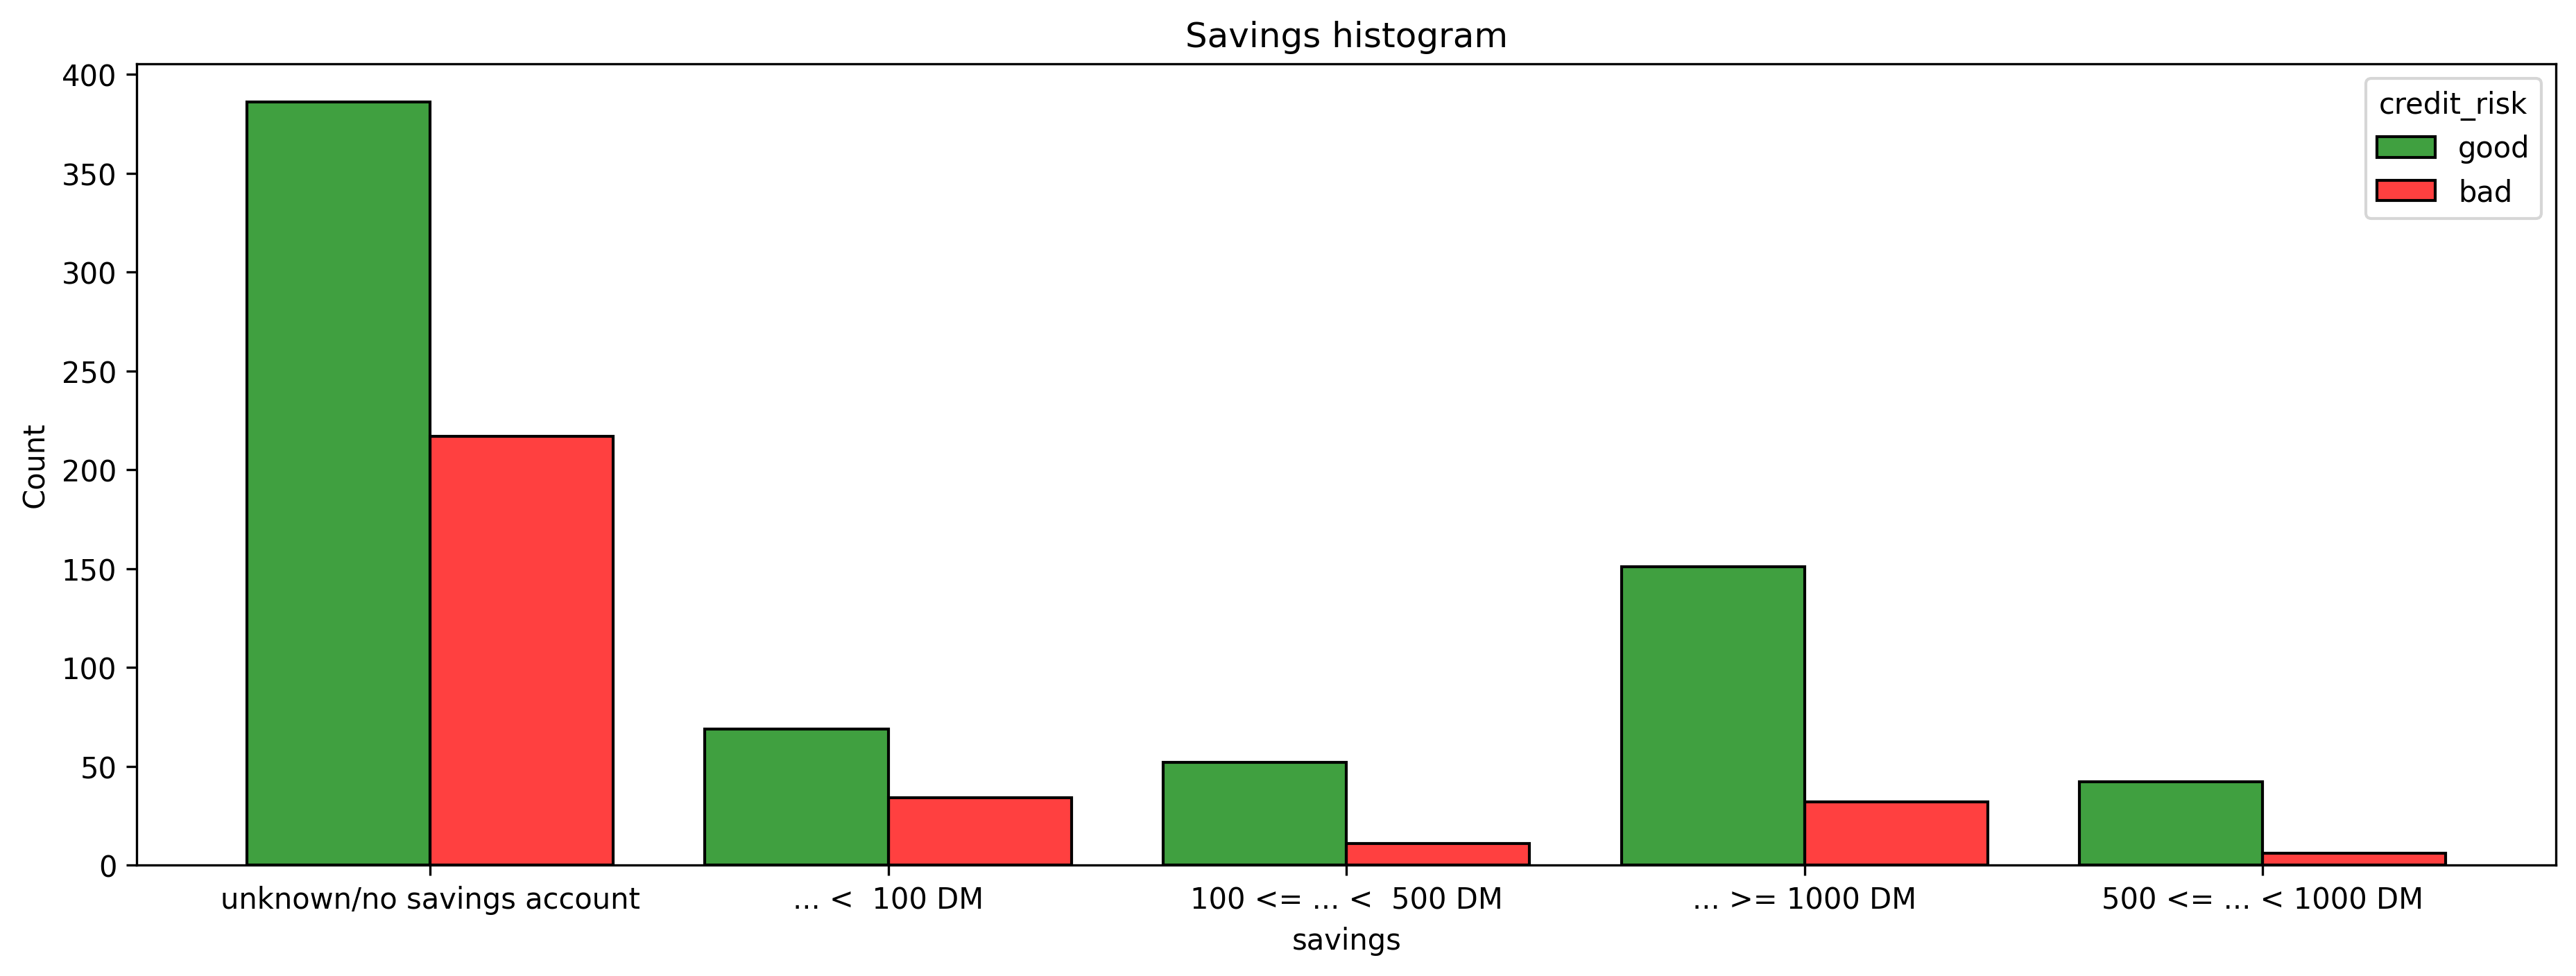

In [ ]:
plt.figure(figsize=(15, 5), dpi=300)
sns.histplot(data, x='savings', hue='credit_risk', multiple='dodge', palette=sns.color_palette(['g', 'r']), shrink=0.8)
plt.title('Savings histogram')
plt.show()

Вывод: любое значение сбережений для положительных кейсов превышает соответствующее значение  для отрицательных кейсов. Также заметим, что для людей без сбережений количество положительных и отрицательных кейсов больше, чем значения в других категориях.

Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например:

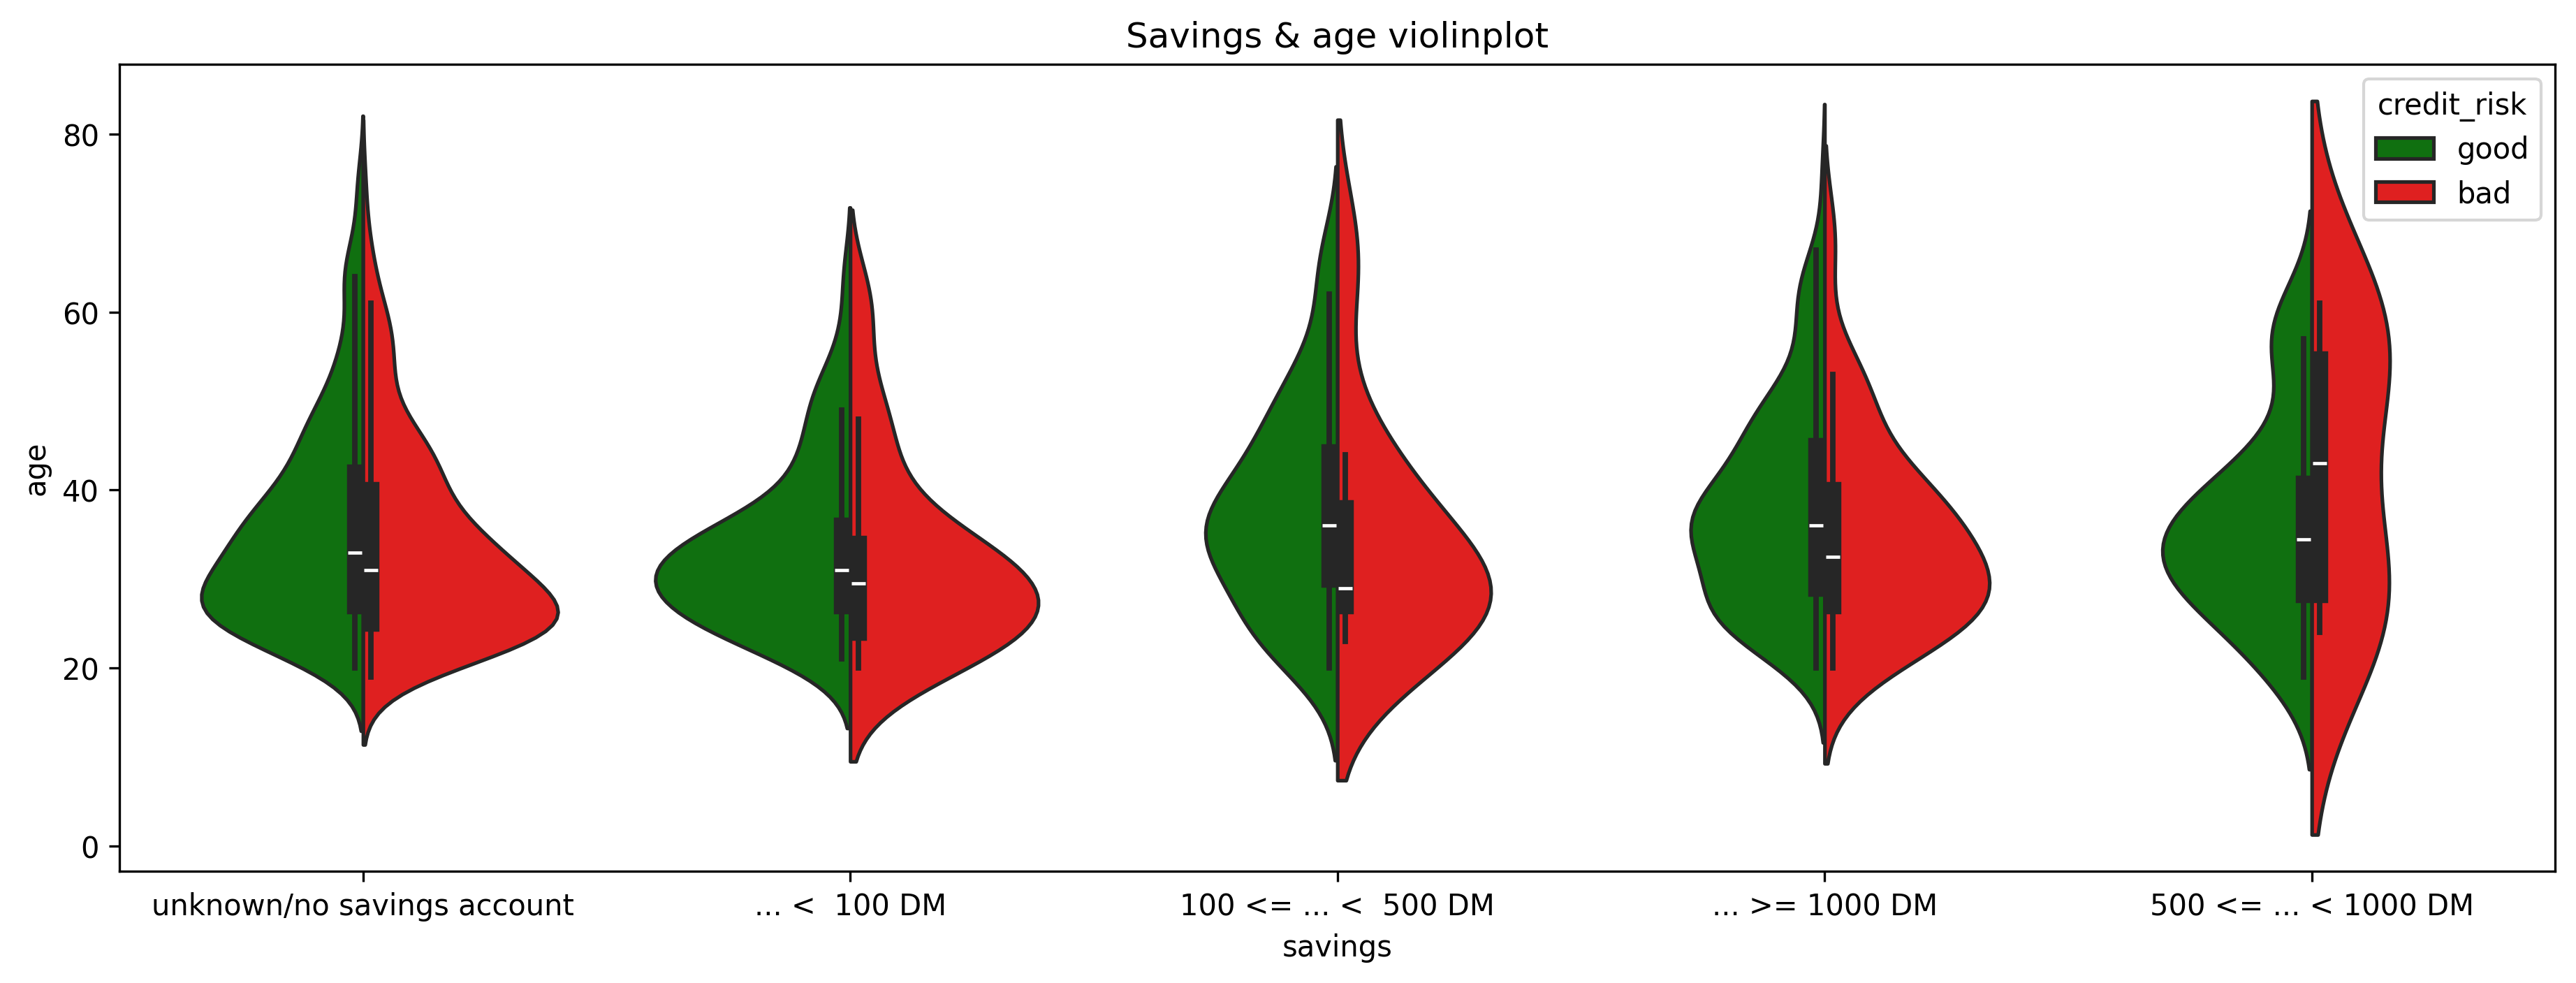

In [ ]:
plt.figure(figsize=(15, 5), dpi=300)
sns.violinplot(data=data, x='savings', y='age', hue='credit_risk', split=True, palette=sns.color_palette(['g', 'r']))
plt.title('Savings & age violinplot')
plt.show()

Вывод: медианы скрипичных диаграмм примерно одинаковые. Заметим, что ширина графика плотности (частотность), когда сбережения '500 <= ... < 1000 DM' отличается по форме от остальных. Также "сгущения" для положительных кейсов происходят у людей старших, чем для отрицательных.

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

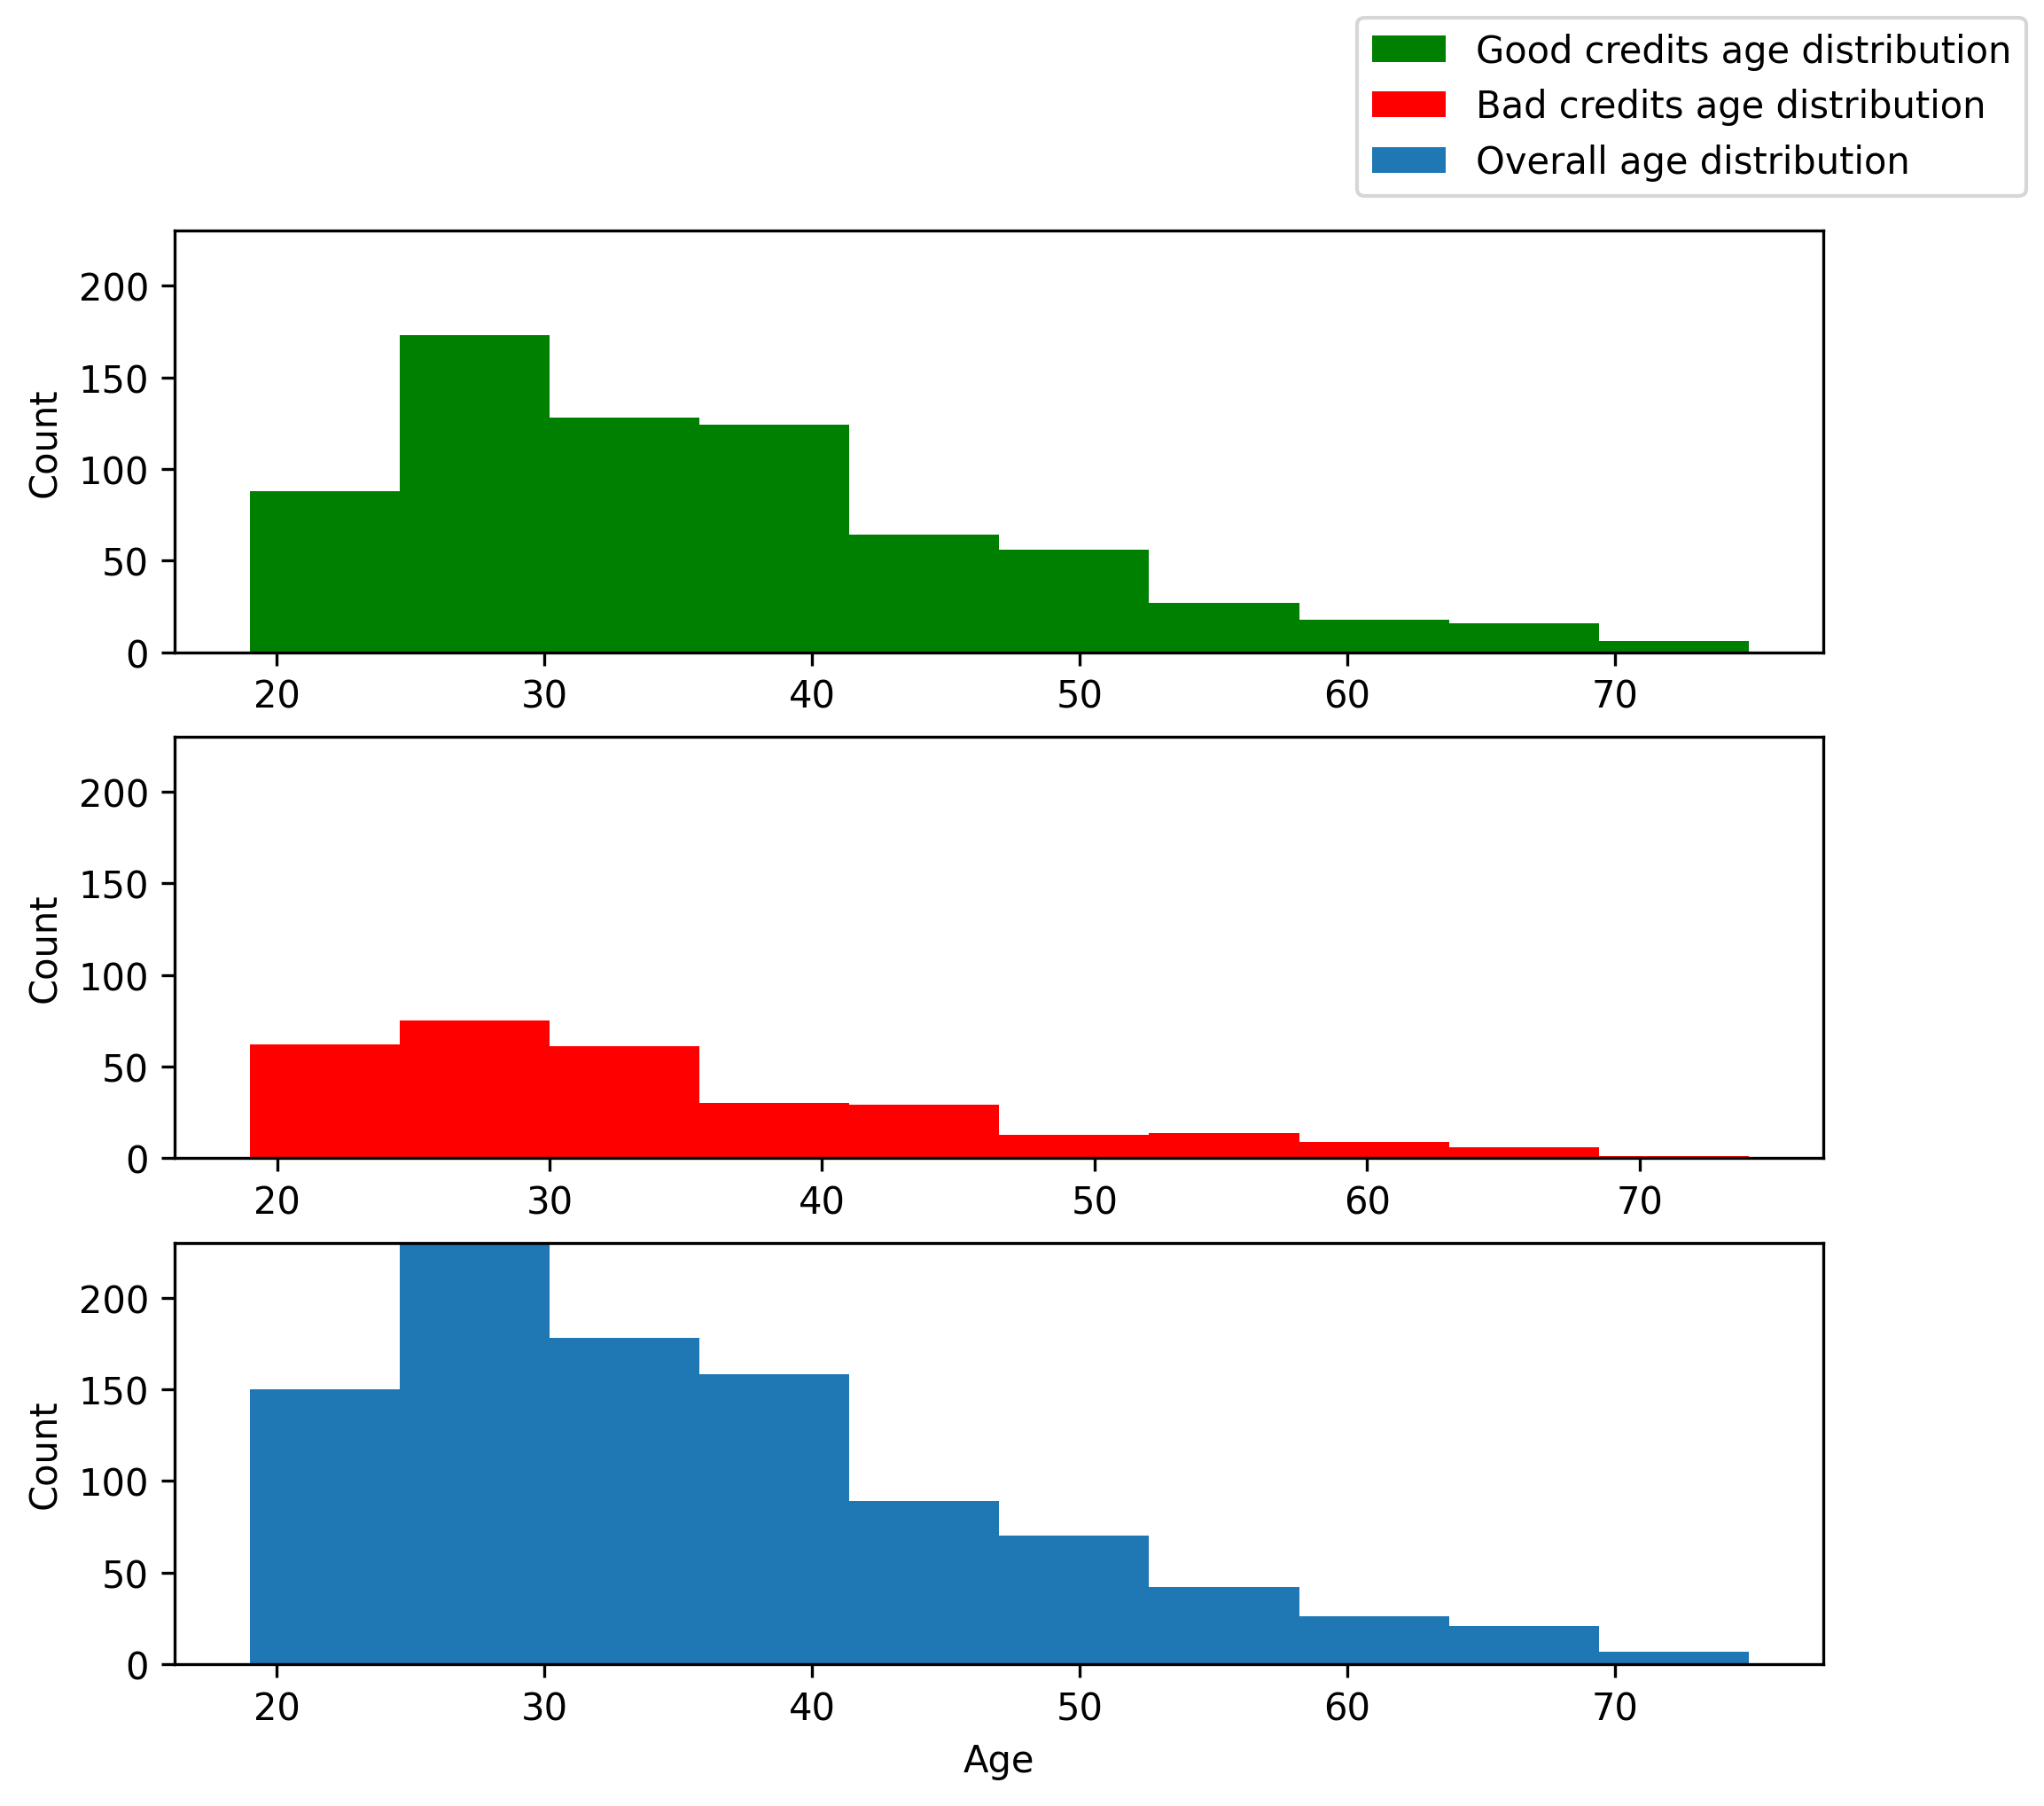

In [ ]:
fig = plt.figure(figsize=(8, 7), dpi=300)
subplts = fig.subplots(nrows=3)
subplts[0].hist(data[data.credit_risk == 'good'].age, color='g', label='Good credits age distribution')
subplts[1].hist(data[data.credit_risk == 'bad'].age, color='r', label='Bad credits age distribution')
subplts[2].hist(data.age, label='Overall age distribution')

lines = []
labels = []
for subplt in subplts:
    ln, lbl = subplt.get_legend_handles_labels()
    lines.extend(ln)
    labels.extend(lbl)
    subplt.set_ylim(0, 230)
    subplt.set_ylabel('Count')
plt.xlabel('Age')
fig.legend(lines, labels)
plt.show()

Вывод: Для трех графиков со значения возраста, большего 20 начинается убывание числа людей. Для возраста, чуть большего 25 и до 30 для всех графиков наблюдается пик количества людей.

Построим диаграмму рассеяния с продолжительностью и размерами кредитов в качестве осей, обозначив положительные и отрицательные кейсы разными цветами.

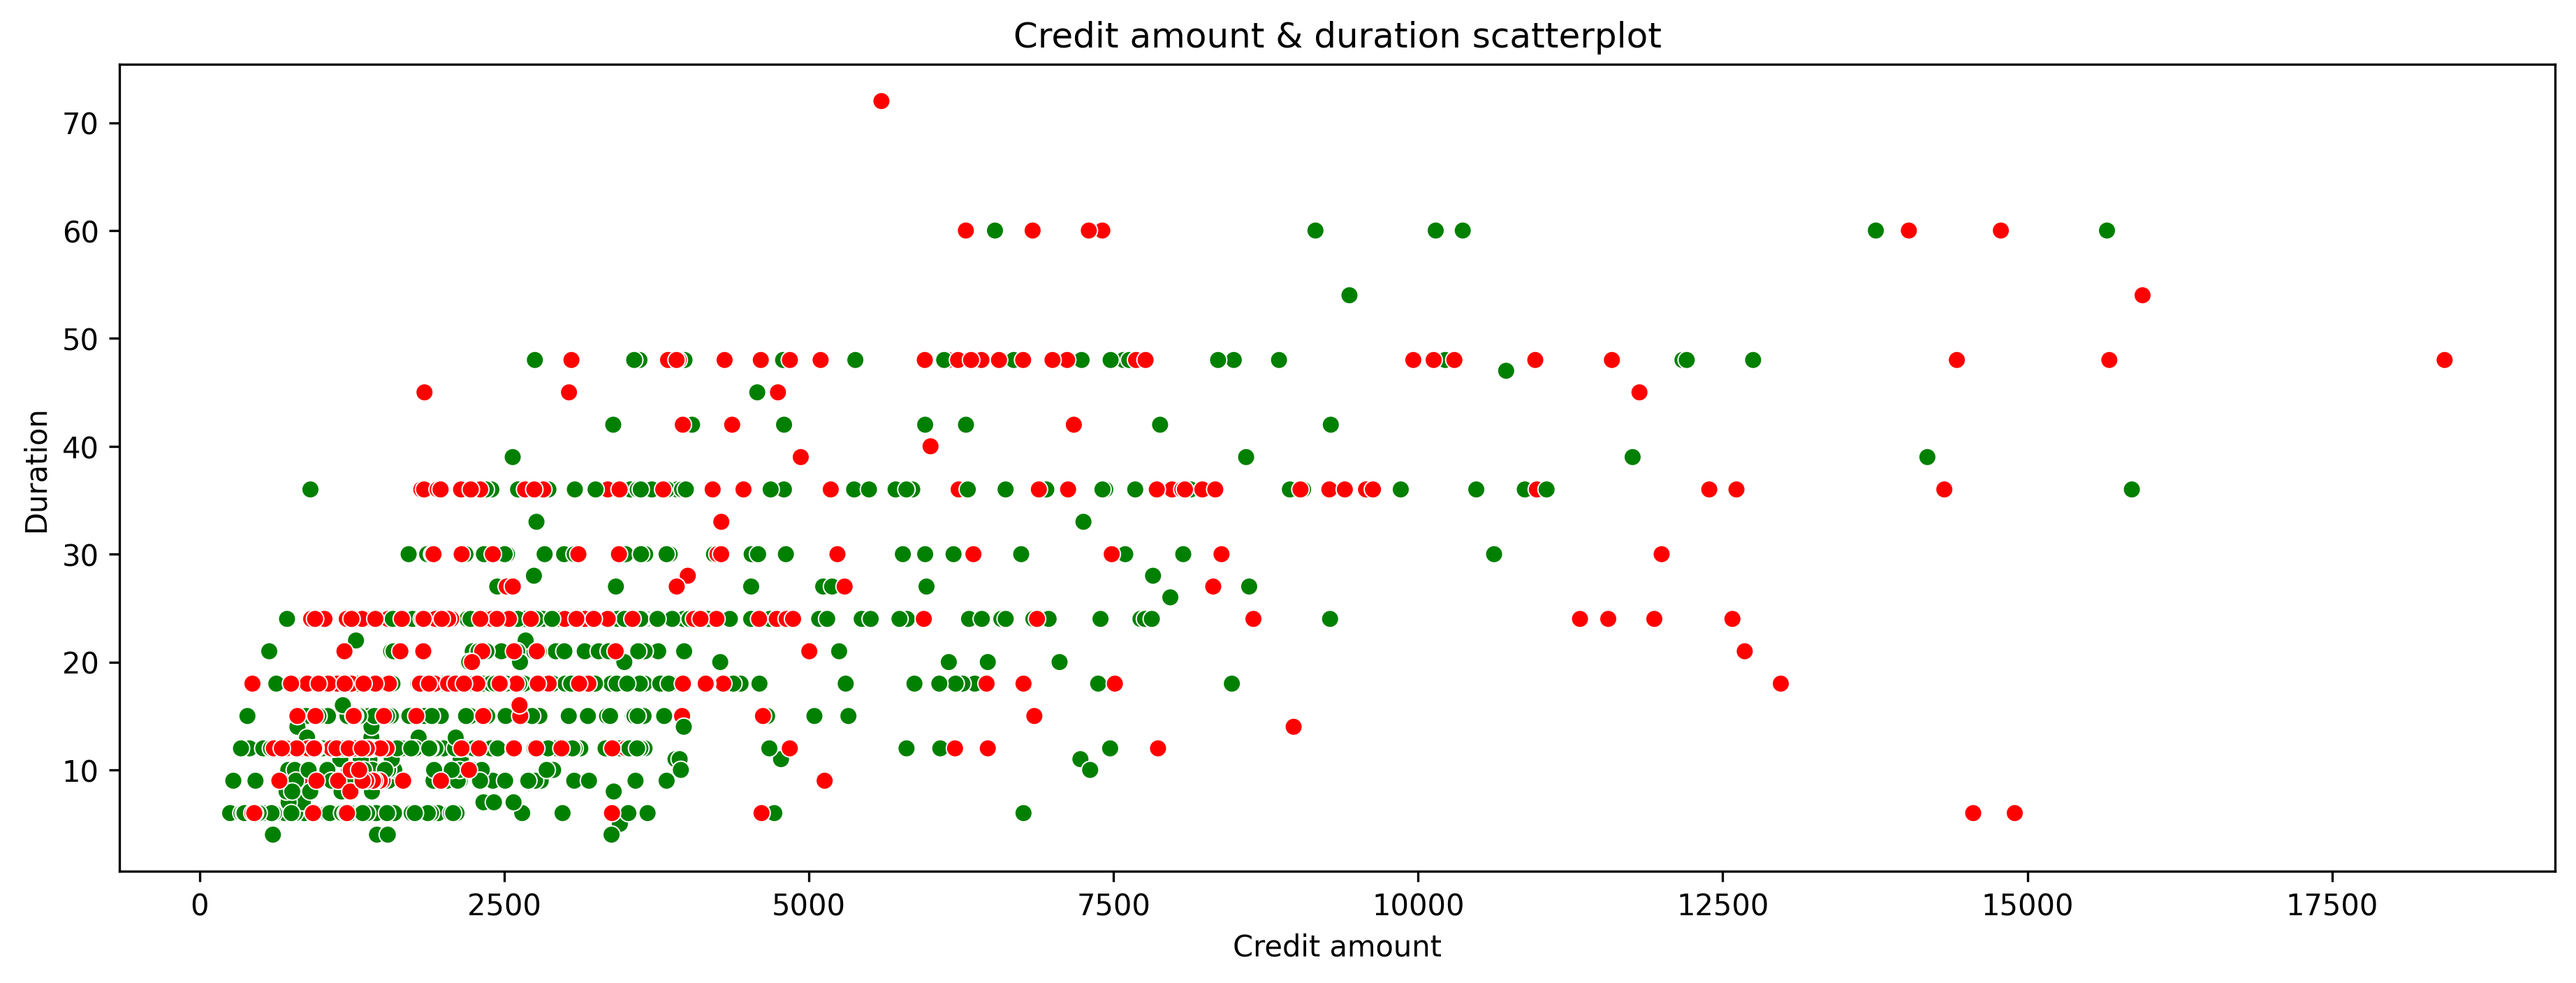

In [ ]:
plt.figure(figsize=(15, 5), dpi=300)
sns.scatterplot(data=data, x='amount', y='duration', hue='credit_risk', palette=sns.color_palette(['g', 'r']), legend=False)
plt.xlabel('Credit amount')
plt.ylabel('Duration')
plt.title('Credit amount & duration scatterplot')
plt.show()

Вывод: при размере кредита менее 5000 и продолжительности менее 40 наблюдается плотное рассеивание точек для положительных и для отрицательных кейсов. Также для двух категорий есть выбросы. Явный типо корреляции (положительная/отрицательная/линейная) определить по графику трудно.

Построим 3D версию диаграммы рассеяния, добавив ось с возрастом.

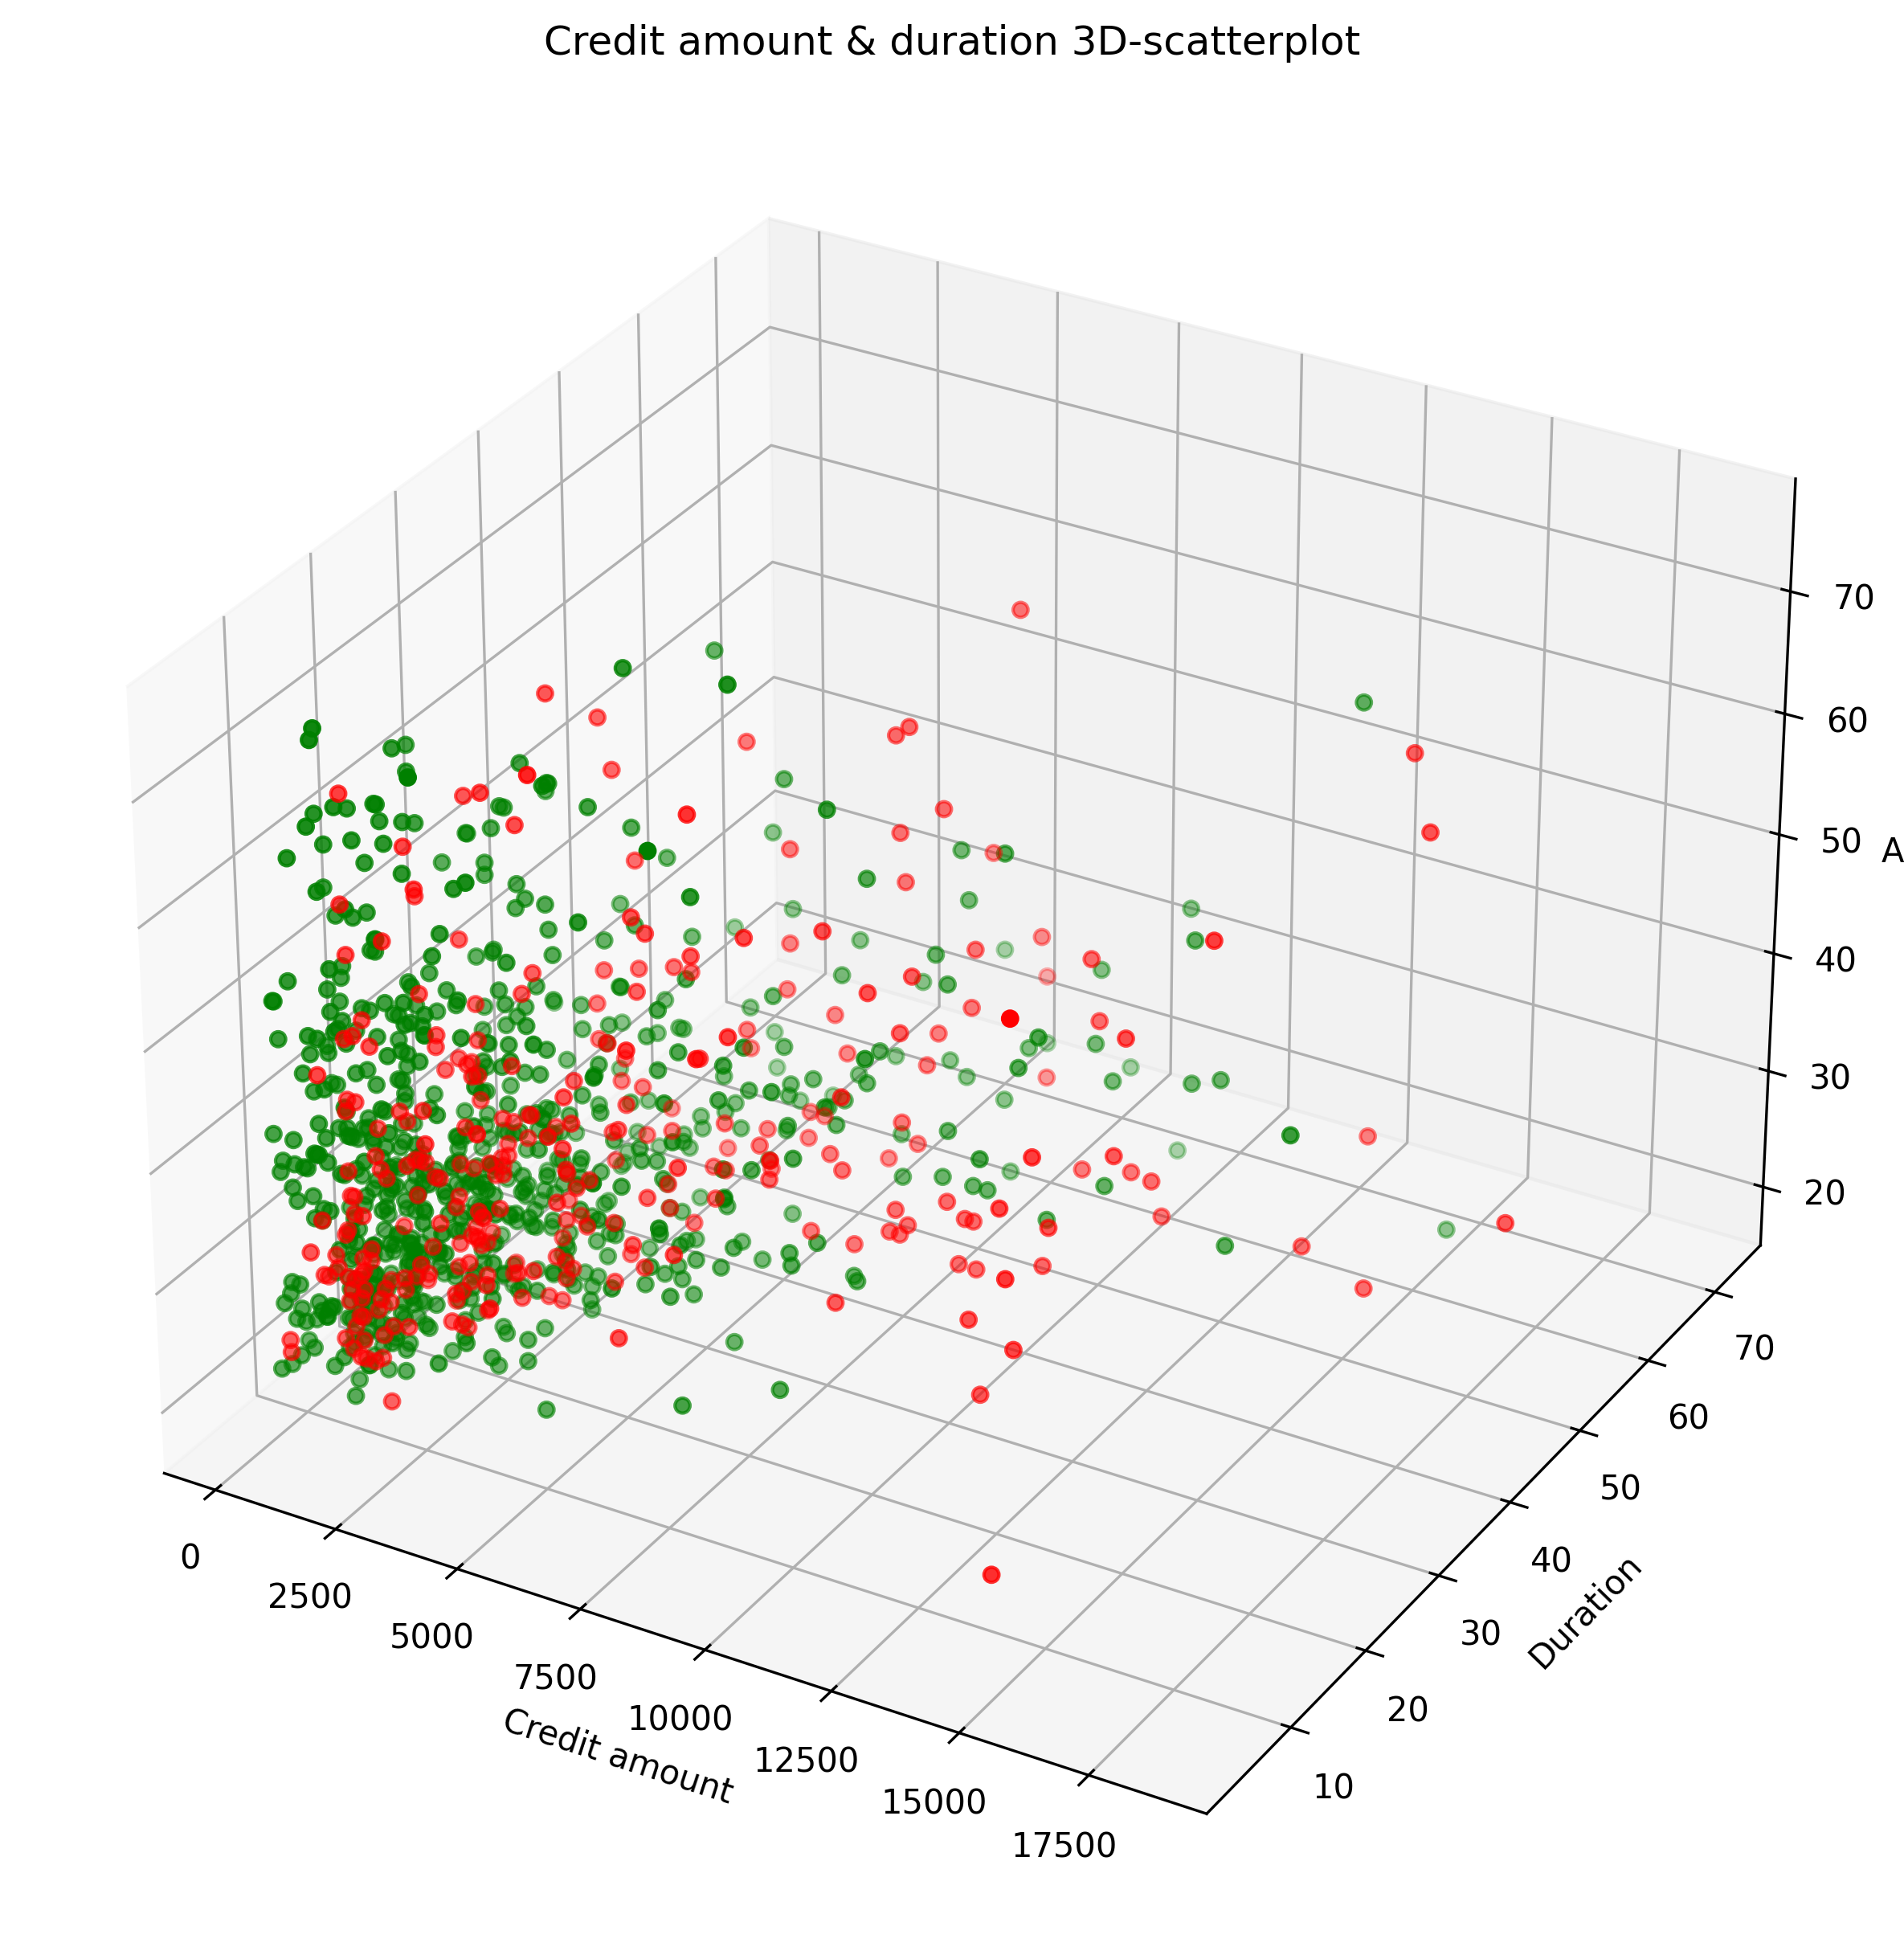

In [ ]:
fig = plt.figure(figsize=(15, 10), dpi=300)
sub = fig.add_subplot(projection='3d')
plt.title('Credit amount & duration 3D-scatterplot')

sub.scatter(data.amount[data.credit_risk == 'good'], data.duration[data.credit_risk == 'good'], data.age[data.credit_risk == 'good'], c='g')
sub.scatter(data.amount[data.credit_risk == 'bad'], data.duration[data.credit_risk == 'bad'], data.age[data.credit_risk == 'bad'], c='r')
sub.set_xlabel('Credit amount')
sub.set_ylabel('Duration')
sub.set_zlabel('Age')
plt.show()

Вывод: при размере кредита менее 2500, продолжительности от 10 до 50 и возрасте до 40 наблюдается плотное рассеивание точек для положительных и для отрицательных кейсов. Также для двух категорий есть выбросы. Явный типо корреляции (положительная/отрицательная/линейная) определить по графику трудно.

Представим все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавимся от категориальных признаков.

In [ ]:
data.drop(columns=['credit_history', 'purpose', 'personal_status_sex', 'other_debtors', 'property', 'other_installment_plans', 'housing', 'job'], inplace=True)

In [ ]:
data['telephone_code'] = (data.telephone == 'yes (under customer name)').astype('int')
data['foreign_worker_code'] = (data.foreign_worker == 'yes').astype('int')
data['people_liable_code'] = (data.people_liable == '3 or more').astype('int')

In [ ]:
data['status_code'] = data['status'].apply(lambda x: ['no checking account', '... < 0 DM', '0<= ... < 200 DM', '... >= 200 DM / salary for at least 1 year'].index(x))
data['savings_code'] = data['savings'].apply(lambda x: ['unknown/no savings account', '... <  100 DM', '100 <= ... <  500 DM', '500 <= ... < 1000 DM', '... >= 1000 DM'].index(x))
data['employment_duration_code'] = data['employment_duration'].apply(lambda x: ['unemployed', '< 1 yr', '1 <= ... < 4 yrs', '4 <= ... < 7 yrs', '>= 7 yrs'].index(x))
data['installment_rate_code'] = data['installment_rate'].apply(lambda x: ['< 20', '20 <= ... < 25', '25 <= ... < 35', '>= 35'].index(x))
data['present_residence_code'] = data['present_residence'].apply(lambda x: ['< 1 yr', '1 <= ... < 4 yrs', '4 <= ... < 7 yrs', '>= 7 yrs'].index(x))
data['number_credits_code'] = data['number_credits'].apply(lambda x: ['1', '2-3', '4-5', '>= 6'].index(x))

In [ ]:
data.drop(columns=['telephone', 'foreign_worker', 'people_liable', 'status', 'savings', 'employment_duration',
                   'installment_rate', 'present_residence', 'number_credits'], inplace=True)

In [ ]:
data['credit_risk'] = (data.credit_risk == 'good').astype('int') # для 14 номера

In [ ]:
data.sample(4)

,duration,amount,age,credit_risk,telephone_code,foreign_worker_code,people_liable_code,status_code,savings_code,employment_duration_code,installment_rate_code,present_residence_code,number_credits_code
306,6,1374,36,1,1,0,0,0,0,2,3,1,0
290,12,3565,37,1,0,0,1,3,4,1,2,0,1
772,18,1217,47,0,1,0,0,0,0,2,0,2,0
769,15,1275,24,0,0,0,0,0,4,2,0,1,0


У нас получилась таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуем придумать какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения.

Реализуем функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1).

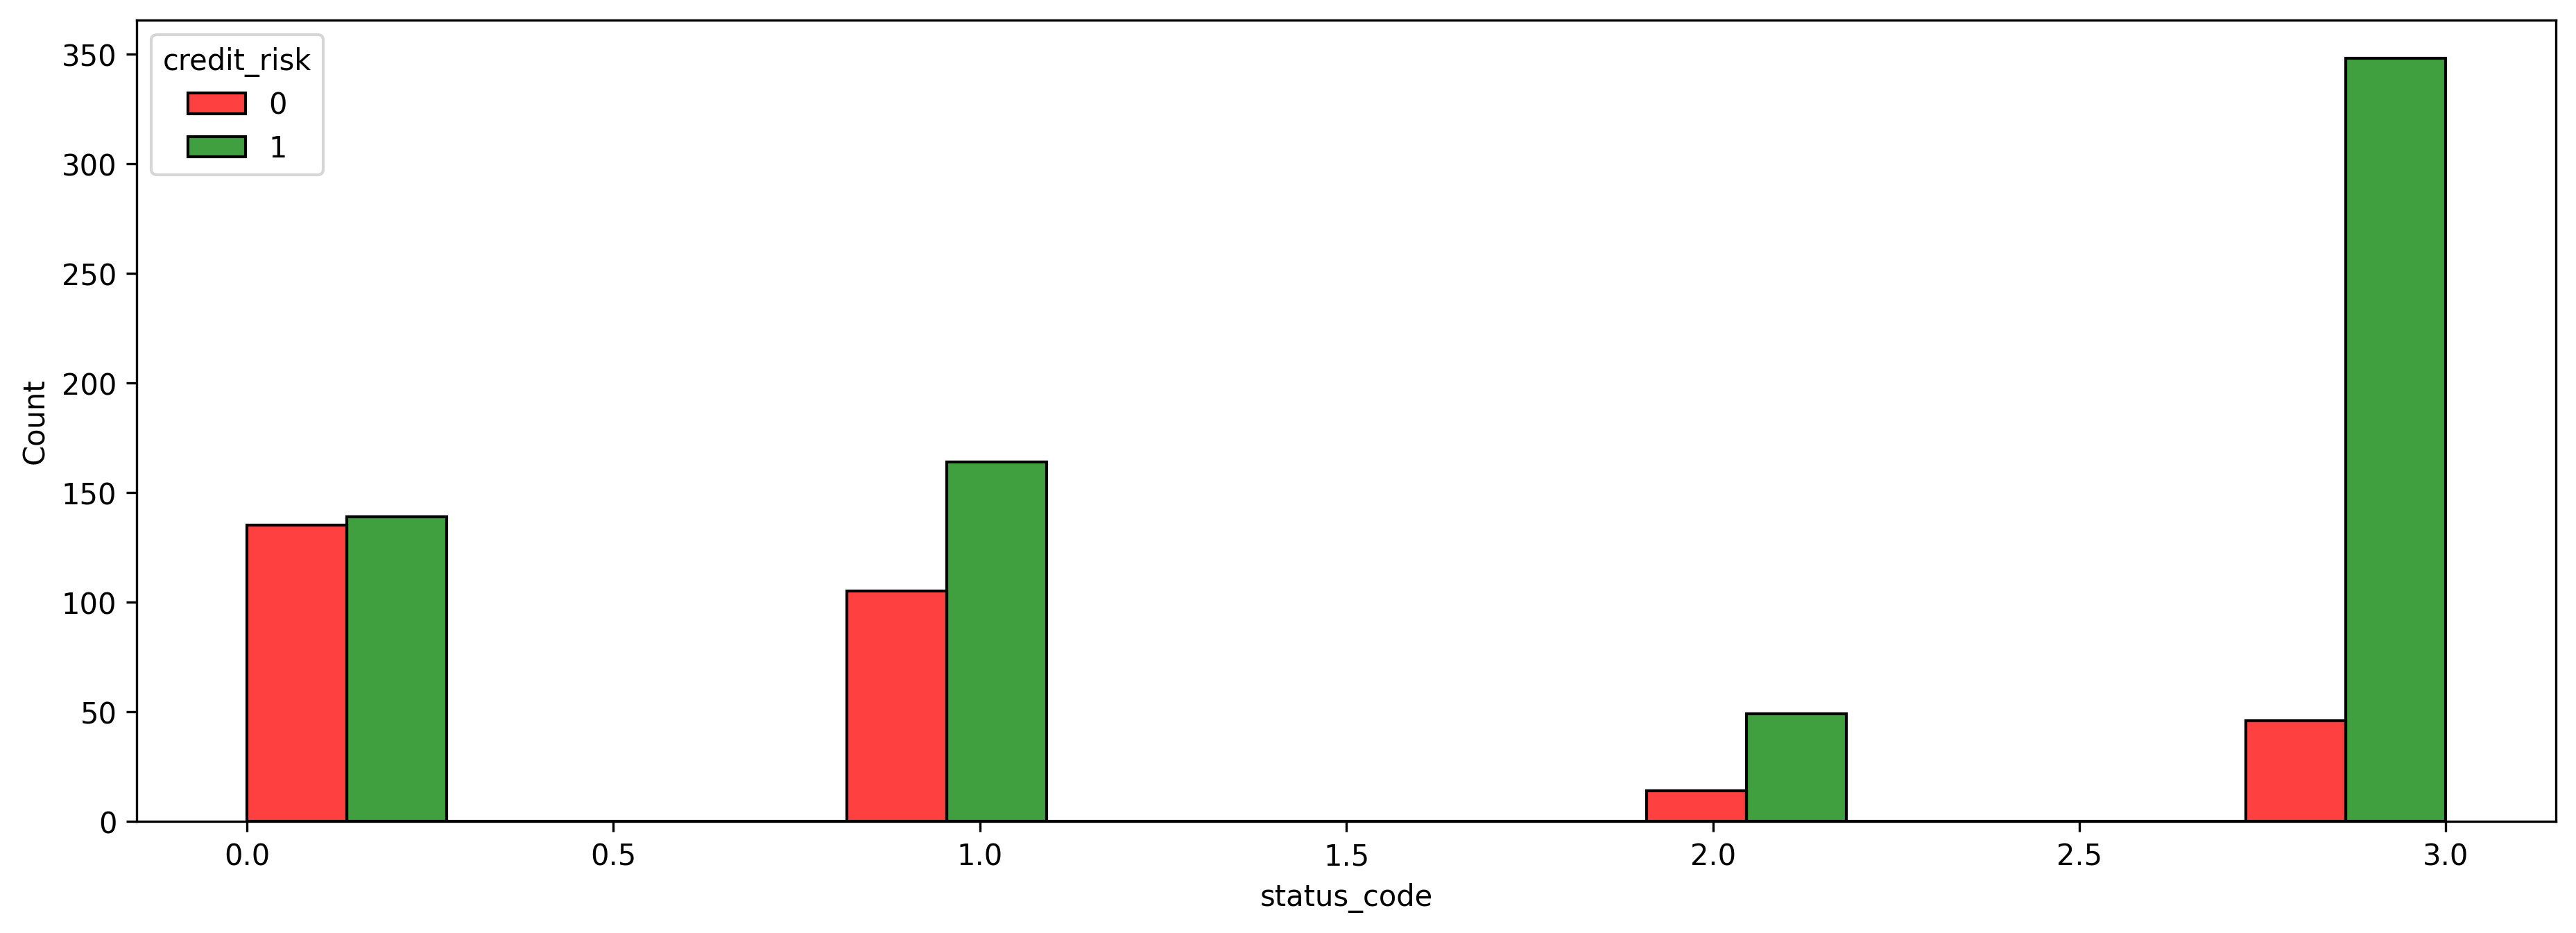

In [ ]:
plt.figure(figsize=(15, 5), dpi=300) # Заметим, что при status_code >= 1 значительно преобладает credit_risk = 1
sns.histplot(data, x='status_code', hue='credit_risk', multiple='dodge', palette=sns.color_palette(['r', 'g']))
plt.show()

<Figure size 4500x1500 with 0 Axes>

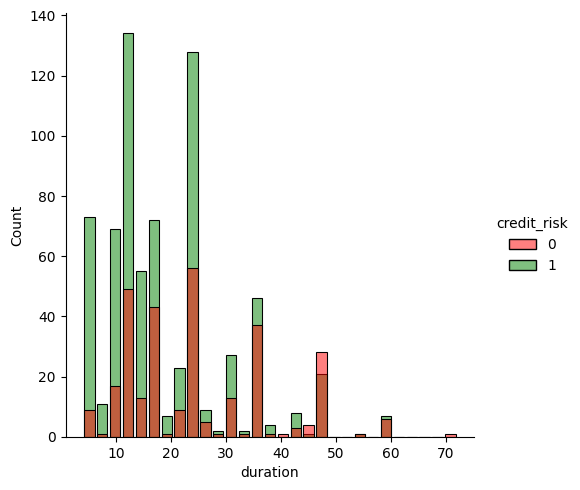

In [ ]:
plt.figure(figsize=(15, 5), dpi=300) # Заметим, что есть как преобладающие зеленые значения (credit_risk=1), так и примерно после с 40 начинают преобладать красные. Трудно выделить какую-либо зависимость на данном графике.
sns.displot(data, x='duration', hue='credit_risk', palette=sns.color_palette(['r', 'g']), shrink=0.8);
plt.show()

Посмотрим корреляцию и попытаемся проанализировать результаты

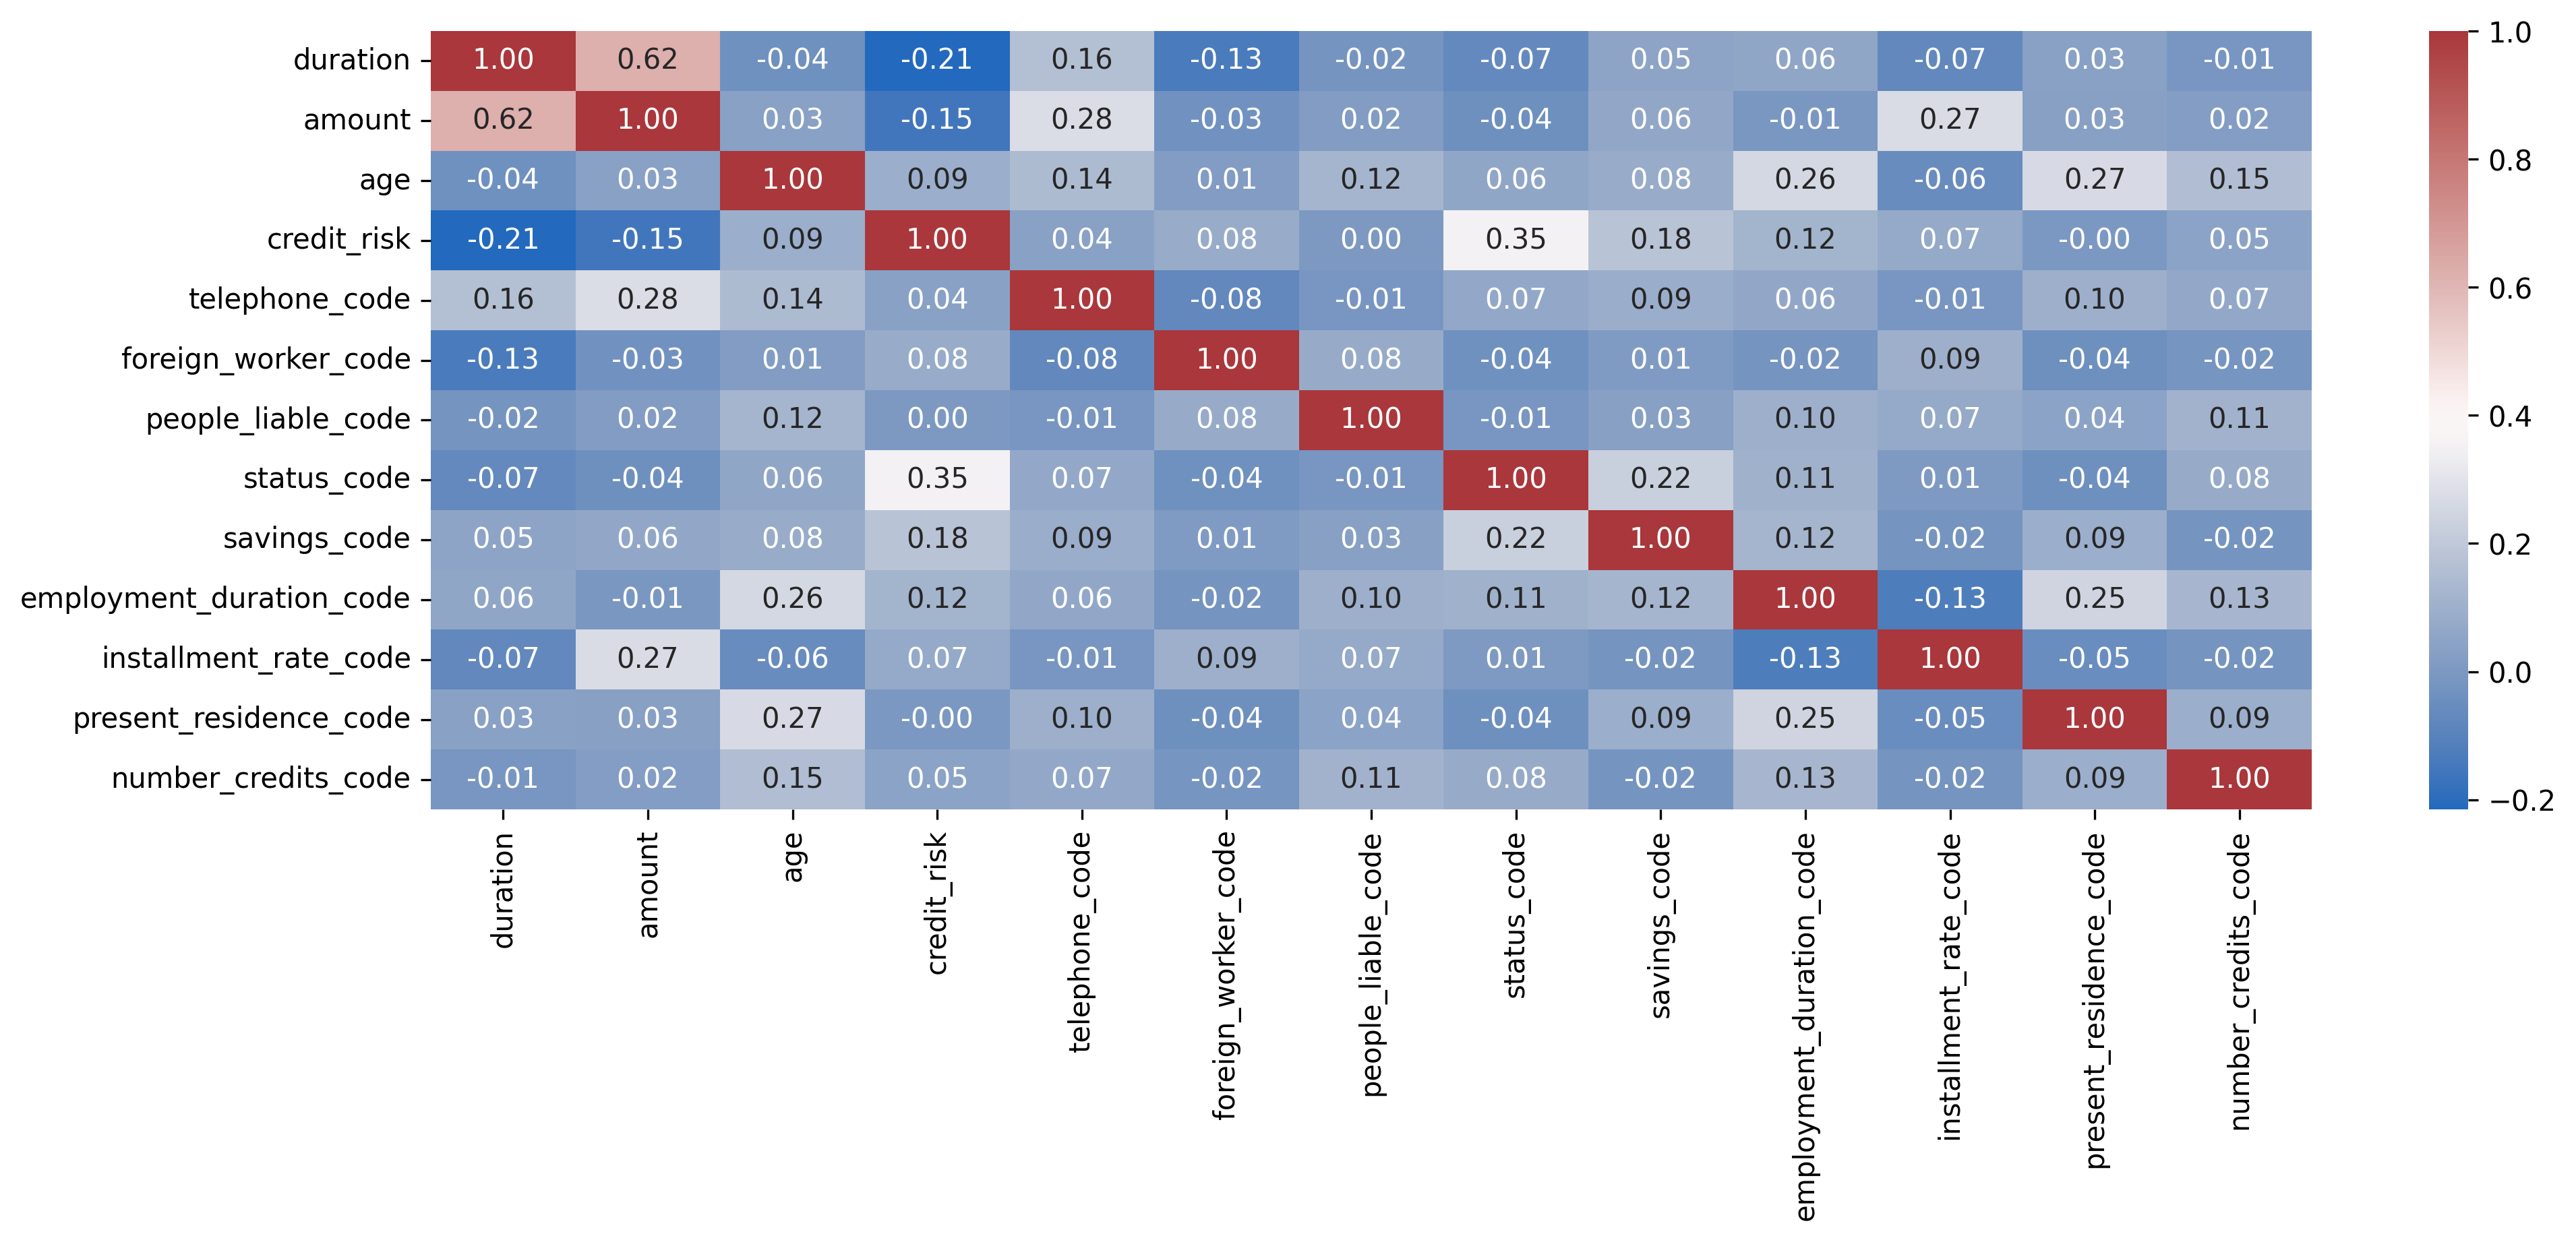

In [ ]:
plt.figure(figsize=(15, 5), dpi=300)
sns.heatmap(data.corr(), cmap='vlag', annot=True, fmt='0.2f');
plt.show()

Рассмотрим данный heatmap. Заметим, что следующие признаки "хорошо" (лучше всех из имеющихся) коррелируют с целевой переменной: duration, amount, status_code, savings_code, employment_duraion_code. Логично именно их учитывать при вычислении целевой переменной. Пришла идея взять коэффициенты из данного heatmap для вышеперечисленных признаков и, основываясь на них, сделать прогноз. Но порядки данных различны... надо масштабировать признаки... сделаем это через вычитание минимума из каждого признака и деление на разницу максимального и минимального значения. Далее сравним полученное значение с нулем (корреляция больше нуля, когда с увеличением одного столбца, увеличивается и другой; меньше нуля - когда, увеличением одного столбца, уменьшается и другой) и сделаем вывод 0 это или 1.

In [ ]:
def scale(col: np.array) -> np.array:
    return (col - np.min(col)) / (np.max(col) - np.min(col))

In [ ]:
def predict(Xtest: np.array) -> np.array:
    tr_Xtest = Xtest.transpose() # транспонируем, т.к. интересуют значения в столбцах
    mas = -0.21 * scale(tr_Xtest[0]) - 0.15 * scale(tr_Xtest[1]) + 0.35 * scale(tr_Xtest[7]) + 0.18 * scale(tr_Xtest[8]) + 0.12 * scale(tr_Xtest[9])
    return (mas >= 0).astype(int)

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = data.drop('credit_risk', axis=1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
accuracy_score(y_test, predict(X_test))

0.692

In [ ]:
accuracy_score(y_train, predict(X_train))

0.7413333333333333